### Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [53]:
df = pd.read_csv('./data/bengaluru_house_prices.csv')

In [54]:
df.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2703,Super built-up Area,Ready To Move,Ambedkar Nagar,3 BHK,NaN,1936,4.0,2.0,126.0


In [55]:
min_threshold, max_threshold = df.price.quantile([.001, 0.999])
min_threshold, max_threshold

(11.159500000000001, 2000.0)

In [56]:
# step 2
df = df[(df.price > min_threshold) & (df.price < max_threshold)]

In [57]:
df.shape

(13291, 9)

In [58]:
std = df.price.std()
std

125.43434724473614

In [59]:
u_limit = df.price.mean() + (4*std)
l_limit = df.price.mean() - (4*std)
u_limit,l_limit 

(611.7477497493906, -391.72702820849855)

In [60]:
df2 = df[(df.price > l_limit) & (df.price < u_limit)]
df2.shape

(13144, 9)

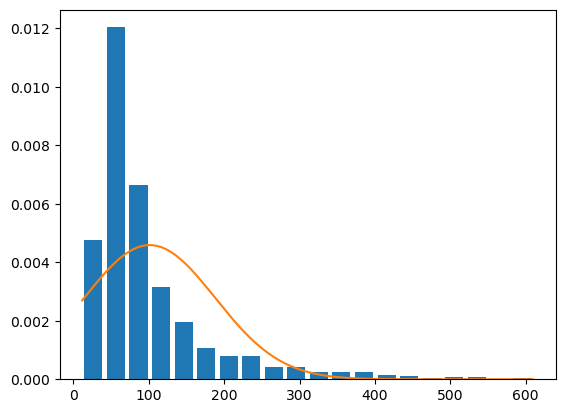

In [72]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.price,bins=20,rwidth=0.8, density=True)
rng = np.arange(df2.price.min(), df2.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price.mean(),df2.price.std()))
plt.show()

In [62]:
df['zscore'] = (df.price - df.price.mean() ) / std

In [63]:
df3 = df[(df.zscore > -4) & (df.zscore < 4 )]
df3.shape

(13144, 10)